# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pivottablejs import pivot_ui
import scipy.stats as stats

# Importing Data

In [3]:
# Import and clean Infaltion data
inflation_file = "Data/inflation_1810025601-noSymbol.csv"
inflation_df = pd.read_csv(inflation_file, encoding="utf-8")
inflation_df = inflation_df.rename(columns={"Reference period": "Year"})

# Summerize average inflation by year and drop unwanted rows and columns:
pivot = pd.pivot_table(inflation_df, values='Percent', index=inflation_df['Year'].str[-4:], aggfunc='mean')
pivot.index = pivot.index.astype(int)
pivot.drop([2003, 2004, 2005, 2006, 2007, 2008, 2022, 2023], inplace=True)
inflation_df_avg = pivot
inflation_df_avg.head(13)

,Percent
Year,
2009,2.716667
2010,1.191667
2011,1.816667
2012,1.708333
2013,1.183333
2014,1.350000
2015,1.775000
2016,1.616667
2017,1.183333


In [6]:
# Importing and cleaning HouseHold Spending Data
spending_file = "Data/spending_3610012401-noSymbol.csv"
spending_df = pd.read_csv(spending_file, encoding="utf-8", on_bad_lines='skip')
spending_df = spending_df.rename(columns={"Estimates": "Year"})
spending_df.head()


,Year,Household final consumption expenditure,Food and non-alcoholic beverages,Food,Non-alcoholic beverages,"Alcoholic beverages, tobacco and cannabis",Alcoholic beverages,Tobacco,Cannabis products for non-medical use (licensed),Cannabis products for non-medical use (unlicensed),...,"Jewellery, clocks and watches",Other personal effects,Child care services outside the home,Child care services in the home,Other social services,Undertaking and other funeral services,Legal and other services,Net expenditure abroad,Expenditure by Canadians abroad,Expenditure by non-residents in Canada
0,Q1 2003,"168,235","16,079","14,292","1,787","8,114","3,441","3,291",..,"1,382",...,760,499,700,266.0,911,338.0,"1,134",-185,"4,812","-4,997"
1,Q2 2003,"169,357","16,149","14,354","1,795","8,166","3,448","3,322",..,"1,396",...,758,501,705,264.0,917,349.0,"1,138",401,"4,470","-4,069"
2,Q3 2003,"171,775","16,166","14,369","1,797","8,284","3,503","3,372",..,"1,409",...,765,500,715,262.0,925,352.0,"1,147",714,"5,100","-4,386"
3,Q4 2003,"171,840","16,265","14,457","1,808","8,390","3,546","3,424",..,"1,420",...,774,501,726,260.0,937,365.0,"1,163",614,"5,335","-4,721"
4,Q1 2004,"175,190","16,424","14,600","1,824","8,452","3,571","3,451",..,"1,430",...,793,520,744,258.0,958,362.0,"1,169",522,"5,482","-4,960"


In [34]:
# Import and clean Liabilities Data 
Liabilities_data_path = "CleanData/Liabilities.csv"
Liabilities_df = pd.read_csv(Liabilities_data_path)
Liabilities_df = Liabilities_df.rename(columns={"REF_DATE": "Year", "VALUE": "Amount", "Credit liabilities of households": "Credit_Liabilities"})

# Summerrize data by year
Liabilities_df = Liabilities_df[['Year', 'Credit_Liabilities', 'Amount']]
Liabilities_df['Year'] = pd.to_datetime(Liabilities_df['Year']).dt.year
pivot_table = pd.pivot_table(Liabilities_df, values='Amount', index='Year', columns=['Credit_Liabilities'], aggfunc=np.sum)
pivot_table.head()

Credit_Liabilities,Chartered banks,Credit cards,Credit unions and caisse populaires,Financial vehicle corporations engaged in securitization,Government,Home equity lines of credit,Lines of credit,"Lines of credit, of which: excluding home equity lines of credit",Mortgage loans,Non-bank financial corporations,...,Of which: off balance-sheet NHA-MBS,Of which: real estate secured lending,Other financial corporations n.e.i.,Other lenders n.e.i.,Other personal loans,Personal loans,Residential mortgages,Total credit liabilities of households,Trust companies and mortgage loan companies,Unincorporated business
Year,,,,,,,,,,,,,,,,,,,,,
2009,16152309,648132,1952431,4002081,190565,1846184,2343469,569178,10796755,7518670,...,3248888,12642939,1438001,145995,232793,648396,21404012,17104679,126157,248090
2010,17864464,682701,2071507,4176589,203846,2075497,2625194,640976,11681912,7716475,...,3541924,13757409,1314891,159744,272252,705839,23167166,18294147,153488,261932
2011,20659245,799031,2234644,3010592,220813,2177656,2762211,689859,12565155,7275388,...,2552301,14742811,1590573,166767,267203,788553,24925730,19400111,439579,270395
2012,27173207,921374,2377869,366716,238231,2351802,2905184,669435,13309692,4815632,...,148652,15661494,1628298,166267,245485,871156,26405744,20298853,442749,276789
2013,28480346,880984,2511615,404306,267714,2361617,2949434,707776,13963352,4911435,...,142107,16324969,1619105,173499,224085,1045148,27693206,21163677,376409,283719


In [38]:
Liabilities_summary_df = pivot_table[['Credit cards', 'Financial vehicle corporations engaged in securitization', 
             'Lines of credit, of which: excluding home equity lines of credit', 'Personal loans']]
Liabilities_summary_df = Liabilities_summary_df.rename(columns={'Financial vehicle corporations engaged in securitization': 'Vehicle', 'Lines of credit, of which: excluding home equity lines of credit': 'LOC'})

Liabilities_summary_df 

Credit_Liabilities,Credit cards,Vehicle,LOC,Personal loans
Year,,,,
2009,648132,4002081,569178,648396
2010,682701,4176589,640976,705839
2011,799031,3010592,689859,788553
2012,921374,366716,669435,871156
2013,880984,404306,707776,1045148
2014,895696,387754,732903,1134831
2015,923048,388486,809070,1142789
2016,951960,410667,837852,1181341
2017,984283,404088,856656,1212220


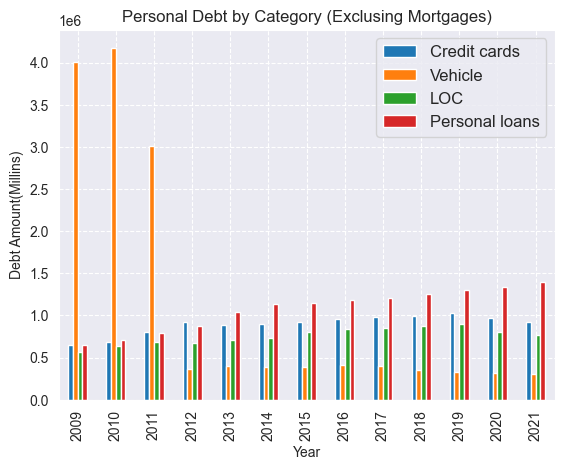

In [40]:
# plot Payment Data 
sns.set_style('dark')
Liabilities_summary_df.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Debt Amount(Millins)")
plt.title("Personal Debt by Category (Exclusing Mortgages)")
plt.grid(linestyle="dashed")
plt.legend(loc='best', fontsize=12, fancybox=True)

# Save the plot as a PNG image file
plt.savefig("Liabilities_plot.png", dpi=300)

# Show Plot
plt.show()

In [24]:
# Import and clean Payment Data 
payment_data_path = "CleanData/MethodofPayment.csv"
PaymentMethod_df = pd.read_csv(payment_data_path)
PaymentMethod_df = PaymentMethod_df.rename(columns={"Debit Card": "Debit", "Credit Card": "Credit"})

# Summerrize data by year
pivot_table = pd.pivot_table(PaymentMethod_df, index=["Year"], values=["Cash", "Debit", "Credit", "Other "], aggfunc="sum")
sum_Payment_df = pivot_table
sum_Payment_df.head()

,Cash,Credit,Debit,Other
Year,,,,
2009,233.4,447.6,267.2,51.8
2013,216.1,491.5,209.3,83.1
2017,154.7,614.0,193.1,38.2
2021,103.1,623.2,183.3,90.4


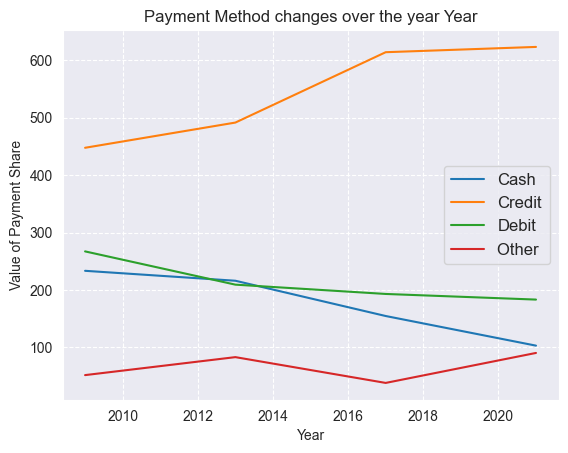

In [25]:
# plot Payment Data 
sns.set_style('dark')
sum_Payment_df.plot(kind="line")
plt.xlabel("Year")
plt.ylabel("Value of Payment Share")
plt.title("Payment Method changes over the year Year")
plt.grid(linestyle="dashed")
plt.legend(loc='best', fontsize=12, fancybox=True)

# Save the plot as a PNG image file
plt.savefig("line_plot.png", dpi=300)

# Show Plot
plt.show()


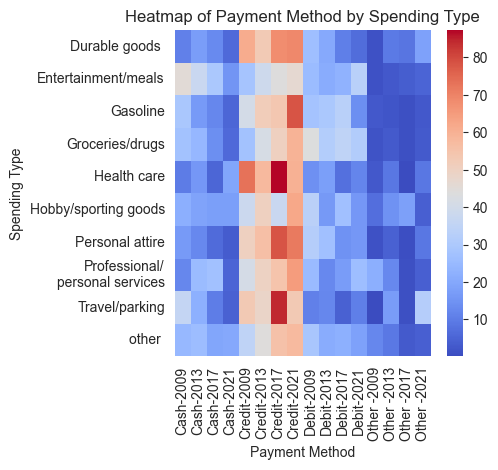

In [26]:
# Create pivot table
spending_pivot = pd.pivot_table(PaymentMethod_df, index=["Spending Type"], columns= ["Year"], values=["Cash", "Debit", "Credit", "Other "], aggfunc="sum")
spendingByType_df = spending_pivot
# Create heatmap using seaborn
sns.heatmap(spendingByType_df, cmap="coolwarm")

# Set plot title and axis labels
plt.title("Heatmap of Payment Method by Spending Type")
plt.xlabel("Payment Method")
plt.ylabel("Spending Type")

#Adjust margins for clean saving
plt.subplots_adjust(left=0.4, bottom=0.2)

plt.savefig("heat_map.png", dpi=300)

# Show the plot
plt.show()
